# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [76]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [4]:
# your code here
employees = pd.read_csv(r"..\data\employees.csv")
employees.head()

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
3,Admin,Master,VP,Manuella,15,33
4,Sales,Master,Analyst,Carla,6,38


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [6]:
# Method 1
# your code here
employees.groupby(employees["Department"]).agg({"Salary":"mean"})

,Salary
Department,
Admin,76.325203
HR,74.237705
IT,70.671642
Sales,73.132231


In [18]:
# Method 2
# your code here
employees.pivot_table(index=["Department"], values=["Salary"])

,Salary
Department,
Admin,76.325203
HR,74.237705
IT,70.671642
Sales,73.132231


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [19]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary"])

Salary
Department Title               
Admin      Analyst    77.736842
           VP         75.571429
           associate  75.813953
HR         Analyst    71.404762
           VP         75.441176
           associate  75.934783
IT         Analyst    69.600000
           VP         74.000000
           associate  68.095238
Sales      Analyst    76.074074
           VP         66.675000
           associate  76.814815

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [23]:
# your code here
employees.pivot_table(index=["Title"], columns=["Years"], values=["Salary"])

Salary                                                         \
Years             1          2          3          4          5          6    
Title                                                                         
Analyst    75.000000  63.384615  73.388889  77.600000  77.615385  87.444444   
VP         74.714286  83.200000  69.000000  82.333333  80.000000  61.071429   
associate  77.333333  83.250000  83.562500  73.300000  64.333333  74.454545   

                                                                             \
Years             7          8          9          10         11         12   
Title                                                                         
Analyst    67.000000  78.000000  86.454545  73.666667  71.181818  68.642857   
VP         78.692308  54.181818  65.666667  70.400000  79.363636  76.222222   
associate  70.166667  69.500000  76.090909  73.941176  73.750000  77.700000   

                                            
Years             13         14         15  
Title                                       
Analyst    69.571429  70.000000  71.200000  
VP         87.000000  74.785714  72.272727  
associate  62.222222  62.800000  64.500000

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [31]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary","Name"], aggfunc={'Salary': np.mean,'Name': 
np.count_nonzero})

Name     Salary
Department Title                     
Admin      Analyst      38  77.736842
           VP           42  75.571429
           associate    43  75.813953
HR         Analyst      42  71.404762
           VP           34  75.441176
           associate    46  75.934783
IT         Analyst      45  69.600000
           VP           47  74.000000
           associate    42  68.095238
Sales      Analyst      54  76.074074
           VP           40  66.675000
           associate    27  76.814815

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [35]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc=[np.median,np.min,np.max,np.std])

median   amin   amax        std
                     Salary Salary Salary     Salary
Department Title                                    
Admin      Analyst     80.5     33    120  26.335347
           VP          75.5     31    120  24.927351
           associate   79.0     30    119  26.524253
HR         Analyst     72.5     31    119  25.093056
           VP          76.5     32    119  26.594817
           associate   76.0     30    119  28.063739
IT         Analyst     69.0     30    119  28.418464
           VP          71.0     31    120  25.568323
           associate   59.5     33    117  28.557866
Sales      Analyst     72.0     30    120  27.855999
           VP          60.0     30    119  27.017931
           associate   79.0     31    120  28.266638

In [ ]:
"""
The data seems off, an analyst earns more than a VP and up to 120k€
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your code here
#no missing values

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [38]:
# your code here
employees.pivot_table(index=["Department"], values=["Salary","Name"], aggfunc={'Salary': np.sum,'Name': 
np.count_nonzero})

,Name,Salary
Department,,
Admin,123,9388
HR,122,9057
IT,134,9470
Sales,121,8849


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [39]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary","Years"], aggfunc={'Salary': np.mean,'Years': 
np.sum})

Salary  Years
Department Title                      
Admin      Analyst    77.736842    292
           VP         75.571429    342
           associate  75.813953    306
HR         Analyst    71.404762    326
           VP         75.441176    198
           associate  75.934783    351
IT         Analyst    69.600000    346
           VP         74.000000    409
           associate  68.095238    336
Sales      Analyst    76.074074    441
           VP         66.675000    293
           associate  76.814815    138

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [50]:
#employees.pivot_table(index=["Department"], values=["Salary"], aggfunc={np.max,np.index})

AttributeError: module 'numpy' has no attribute 'index'

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [51]:
# your code here
fitbit = pd.read_csv(r"..\data\Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [54]:
# your code here
fitbit.dtypes

Date                           object
Calorie burned                  int64
Steps                           int64
Distance                      float64
Floors                          int64
Minutes Sedentary             float64
Minutes Lightly Active          int64
Minutes Fairly Active           int64
Minutes Very Active             int64
Activity Calories               int64
MinutesOfSleep                  int64
MinutesOfBeingAwake             int64
NumberOfAwakings                int64
LengthOfRestInMinutes           int64
Distance_miles                float64
Days                           object
Days_encoded                  float64
Work_or_Weekend                 int64
Hours Sleep                   float64
Sleep efficiency              float64
Yesterday_sleep               float64
Yesterday_sleep_efficiency    float64
Months                         object
Months_encoded                  int64
dtype: object

In [55]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [57]:
# your code here
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [58]:
import matplotlib.pyplot as plt;

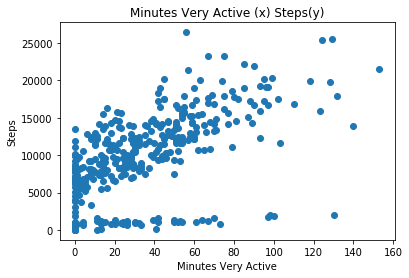

In [64]:
plt.scatter(fitbit["Minutes Very Active"],fitbit["Steps"])
plt.title("Minutes Very Active (x) Steps(y)")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
There seems to be a positive linear relationship between the two variables
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [65]:
# your code here
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

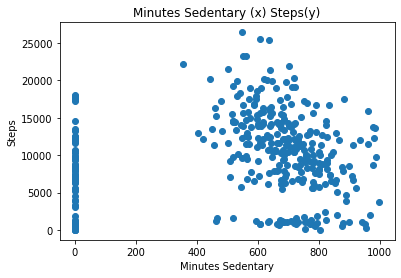

In [66]:
# your code here
plt.scatter(fitbit["Minutes Sedentary"],fitbit["Steps"])
plt.title("Minutes Sedentary (x) Steps(y)")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
Besides certain values with value 0, there seems to be a negative relationships between the variables
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [67]:
# your code here
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

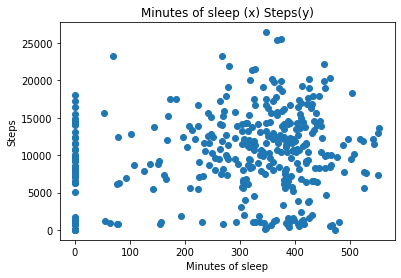

In [68]:
# your code here
plt.scatter(fitbit["MinutesOfSleep"],fitbit["Steps"])
plt.title("Minutes of sleep (x) Steps(y)")
plt.xlabel("Minutes of sleep")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
There is no particular relationship between the variables
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [69]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

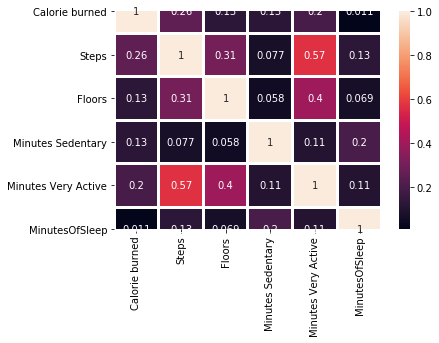

In [82]:
# your code here
cor_fit = fitbit[columns].corr() 
cor_fit
sn.heatmap(cor_fit, annot=True,linewidths=2)

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [90]:
# your code here
cor_fit[["Steps"]].sort_values(by="Steps",ascending=False)

,Steps
Steps,1.000000
Minutes Very Active,0.571452
Floors,0.306511
Calorie burned,0.255305
MinutesOfSleep,0.130986
Minutes Sedentary,0.076906


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [100]:
# your code here
full_data = pd.read_csv(r"..\data\student-mat.csv",sep=";")
time_grades = full_data[["studytime","G3"]]
time_grades = time_grades.rename(columns={"studytime":"Study time","G3":"Grade"})
time_grades.head()

,Study time,Grade
0,2,6
1,2,6
2,2,10
3,3,15
4,2,10


#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D5E509A48>,
      dtype=object)

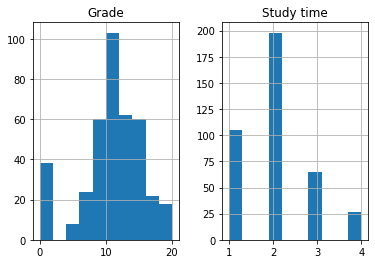

In [101]:
# your code here
time_grades.hist()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [104]:
# your code here
time_grades['Study time'].corr(time_grades["Grade"])

0.0978196896531963

In [105]:
time_grades['Study time'].corr(time_grades["Grade"],method='spearman')

0.10516968678133246

In [ ]:
"""
There is a slight positive correlation with both methods
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

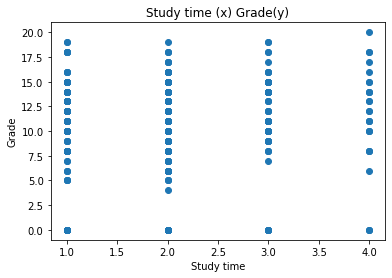

In [106]:
# your code here
plt.scatter(time_grades["Study time"],time_grades["Grade"])
plt.title("Study time (x) Grade(y)")
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()

In [ ]:
"""
There is no correlation whatsover
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
The difference between the Pearson and the Spearman correlation is that the Pearson is most \
appropriate for measurements taken from an interval scale, while the Spearman is more appropriate for \
measurements taken from ordinal scales.
"""